# Zad. 4

Złodziej wkradł się do czyjegoś domu. Ma
plecak / udźwig w wysokości 25 kg. Złodziej wypatrzył przedmioty przedstawione poniżej w
tabeli. Jakie przedmioty powinien wziąć (do max. 25 kg), aby miały w sumie jak największą
wartość?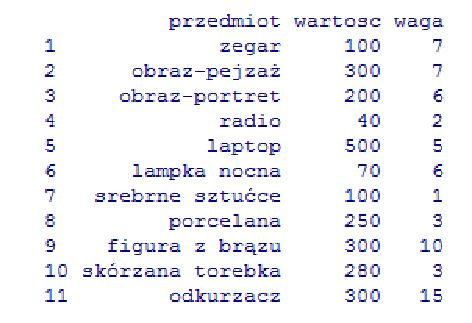

Instalacja biblioteki

In [55]:
pip install pyeasyga

In [61]:
from pyeasyga import pyeasyga

Zadeklarowanie przedmiotów możliwych do kradzieży 

In [3]:
przedmioty = [
    ('zegar', 100, 7),
    ('obraz-pejzaż', 300, 7),
    ('obraz-portret', 200, 6),
    ('radio', 40, 2),
    ('laptop', 500, 5),
    ('lampka nocna', 70, 6),
    ('srebrne sztućce', 100, 1),
    ('porcelana', 250, 3),
    ('figura z brązu', 300, 10),
    ('skórzana torebka', 280, 3),
    ('odkurzacz', 300, 15),
]

Definiujemy przydatne funkcję do zbudowania funkcji fitness

In [4]:
def suma_wagi_plecaka(chromosom):
    waga = 0
    i = 0
    for v in chromosom:
        if v == 1:
            waga += przedmioty[i][2]
        i += 1
    return waga

In [5]:
def sprawdzanie_wagi_plecaka(chromosom):
    waga = 0
    i = 0
    for value in chromosom:
        if value == 1:
            waga += przedmioty[i][2]
            if waga > 25:
                return False
        i += 1
    return True

Definiujemy funkcje fitness

In [13]:
def fitness(chromosom, przedmioty):
    fitness = 0
    if sprawdzanie_wagi_plecaka(chromosom):
        for (wybrany, (rzecz, wartosc, waga)) in zip(chromosom, przedmioty):
            if wybrany:
                fitness += wartosc
    return fitness

Inicjacja algorytmu:

In [67]:
ga = pyeasyga.GeneticAlgorithm(
    przedmioty,
    mutation_probability=0.02,
    population_size=200,
    generations=200,
    crossover_probability=0.8,
    elitism=True
)

ga.fitness_function = fitness

Uruchomienie algorytmu

In [68]:
ga.run()

Wypisanie parametrów rozwiązania

In [76]:
print('waga plecaka:', suma_wagi_plecaka(ga.best_individual()[1]))
print('wartość plecaka:', ga.best_individual()[0])
print('wybrane przedmioty: ',ga.best_individual()[1])

waga plecaka: 25
wartość plecaka: 1630
wybrane przedmioty:  [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]


In [77]:
for i in range(len(ga.best_individual()[1])):
  if (ga.best_individual()[1][i]==1):
    print(przedmioty[i])

('obraz-pejzaż', 300, 7)
('obraz-portret', 200, 6)
('laptop', 500, 5)
('srebrne sztućce', 100, 1)
('porcelana', 250, 3)
('skórzana torebka', 280, 3)
